# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [19]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training set shape (images): (50000, 32, 32, 3)
Training set shape (labels): (50000, 1)
Test set shape (images): (10000, 32, 32, 3)
Test set shape (labels): (10000, 1)
Each image shape: (32, 32, 3)
Number of classes: 100


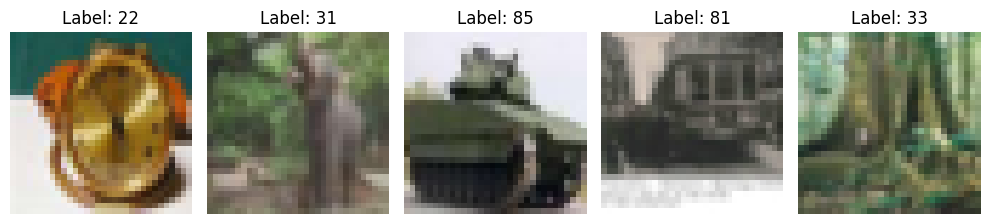

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Shapes
print(f"Training set shape (images): {x_train.shape}")
print(f"Training set shape (labels): {y_train.shape}")
print(f"Test set shape (images): {x_test.shape}")
print(f"Test set shape (labels): {y_test.shape}")

# 2. Dimensions of the images
image_shape = x_train[0].shape
print(f"Each image shape: {image_shape}")

# 3. Number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# 4. A few examples from the training set
def display_sample_images(x_data, y_data, num_samples=5):
    class_labels = list(range(num_classes))  # Replace with class names if available
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        idx = np.random.randint(0, len(x_data))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_data[idx])
        plt.title(f"Label: {y_data[idx][0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets (80% train, 20% validation)
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

# Print shapes to verify the splits
print(f"Training set shape (images): {x_train_split.shape}")
print(f"Training set shape (labels): {y_train_split.shape}")
print(f"Validation set shape (images): {x_val.shape}")
print(f"Validation set shape (labels): {y_val.shape}")
print(f"Test set shape (images): {x_test.shape}")
print(f"Test set shape (labels): {y_test_one_hot.shape}")

Training set shape (images): (40000, 32, 32, 3)
Training set shape (labels): (40000, 100)
Validation set shape (images): (10000, 32, 32, 3)
Validation set shape (labels): (10000, 100)
Test set shape (images): (10000, 32, 32, 3)
Test set shape (labels): (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Layers
# 1. Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Add a pooling layer to reduce size
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2. Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Flatten the data to feed it into dense layers
model.add(Flatten())

# 4. Dense Layer
model.add(Dense(units=64, activation='relu'))

# 5. Output Layer
model.add(Dense(units=100, activation='softmax'))  # 100 output classes for CIFAR-100

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,380 (333.52 KB)

 Trainable params: 85,380 (333.52 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Since the labels are one-hot encoded (with a 1 for the correct class and 0 for the others), the model predicts probabilities for each class. Categorical cross-entropy is used because it compares the predicted probabilities with the actual one-hot encoded labels, measuring how well the model’s predictions match the correct class. If the model is correct, the loss will be small, and if it's wrong, the loss will be larger.

- <b>Optimizer:</b> For the optimizer, I picked Adam because it adjusts the learning rate during training and usually works well without needing too much tuning. I'm also using a learning rate of 0.001 because that's a good place to start for most models."

In [23]:
from keras import optimizers

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Matches one-hot encoded labels
    metrics=['accuracy']
)

In [24]:
print("Shape of y_train_split:", y_train_split.shape)  # Should be (num_samples,)
print("Shape of y_val:", y_val.shape)                # Should be (num_samples,)


Shape of y_train_split: (40000, 100)
Shape of y_val: (10000, 100)


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [25]:
history = model.fit(
    x_train_split, y_train_split,
    epochs=10,                     # I'm starting with 10 epochs because it's a manageable number for testing if the model is learning effectively. If the accuracy keeps improving and the validation loss doesn't increase, I might increase the epochs later.
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0614 - loss: 4.2293 - val_accuracy: 0.1846 - val_loss: 3.4722
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1977 - loss: 3.3769 - val_accuracy: 0.2271 - val_loss: 3.1992
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2468 - loss: 3.0695 - val_accuracy: 0.2582 - val_loss: 3.0398
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2878 - loss: 2.8919 - val_accuracy: 0.2693 - val_loss: 3.0061
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3082 - loss: 2.7727 - val_accuracy: 0.2867 - val_loss: 2.8969
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3279 - loss: 2.6915 - val_accuracy: 0.3014 - val_loss: 2.8810
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3411 - loss: 2.6139 - val_accuracy: 0.3136 - val_loss: 2.7821
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3577 - loss: 2.5317 - 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 32.25 is the percentage of correct predictions made by the model out of all predictions on the test set. An idea of how often the model makes correct predictions.
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> F1 score is a good choice when dealing with imbalanced datasets, as it combines both precision and recall into one metric. It helps evaluate the model’s ability to identify both true positives (correct predictions) and minimize false positives and false negatives.
- <b>Value of metric:</b> 0.3130
- <b>Interpretation of metric value:</b> An F1 score of 0.3130 suggests that the model has a moderate balance between precision (correctly predicted positives) and recall (how many actual positives were correctly identified). The closer the score is to 1, the better the model's performance. A score of 0.3130 indicates that the model is not perfect, but it's performing reasonably well.

In [26]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the test set
y_pred = model.predict(x_test)  # Get the model's predictions
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels (max probability)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')  # 'weighted' gives the average F1 score across all classes
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 32.25%
F1 Score: 0.3130


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.

1.   List item
2.   List item


- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

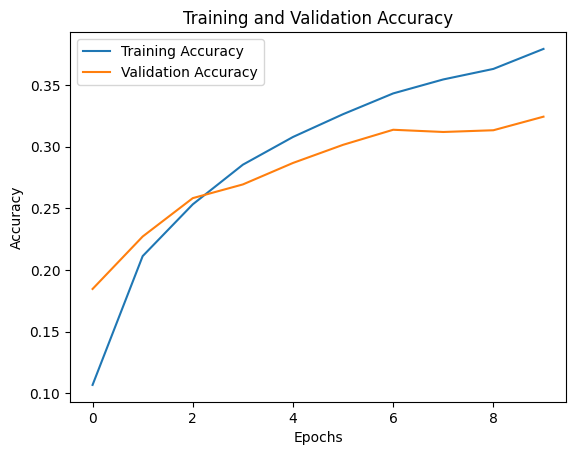

In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [28]:
# To improve the model’s performance, I will implement Dropout which is a regularization technique
# I chose yo implement the Dropout layer because it prevents overfitting by randomly deactivating neurons during training, forcing the model to generalize better
# and it is easy to implement

from keras.layers import Dropout

model_enhanced = Sequential()

# Layers
# 1. Convolutional Layer
model_enhanced.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Add a pooling layer to reduce size
model_enhanced.add(MaxPooling2D(pool_size=(2, 2)))

# 2. Convolutional Layer
model_enhanced.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_enhanced.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Flatten the data to feed it into dense layers
model_enhanced.add(Flatten())

# 4. Dense Layer
model_enhanced.add(Dense(units=64, activation='relu'))

# 5. Dropout Layer
model_enhanced.add(Dropout(0.5))  # 50% of the neurons will be dropped during training

# 6. Output Layer
model_enhanced.add(Dense(units=100, activation='softmax'))  # 100 output classes for CIFAR-100

# Print the model summary
model_enhanced.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,380 (333.52 KB)

 Trainable params: 85,380 (333.52 KB)

 Non-trainable params: 0 (0.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [29]:
# Compile the model
model_enhanced.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model on the same data, but with the new dropout layers
history_enhanced = model_enhanced.fit(x_train_split, y_train_split,
                                      epochs=10,
                                      batch_size=32,
                                      validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0242 - loss: 4.4854 - val_accuracy: 0.1041 - val_loss: 3.9661
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0751 - loss: 4.0301 - val_accuracy: 0.1446 - val_loss: 3.6711
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0985 - loss: 3.8661 - val_accuracy: 0.1664 - val_loss: 3.5619
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1116 - loss: 3.7762 - val_accuracy: 0.1867 - val_loss: 3.4725
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1206 - loss: 3.6987 - val_accuracy: 0.1987 - val_loss: 3.3996
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1343 - loss: 3.6334 - val_accuracy: 0.2148 - val_loss: 3.3184
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1444 - loss: 3.5630 - val_accuracy: 0.2217 - val_loss: 3.2665
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1524 - loss: 3.5203 - 

In [30]:
# Convert the true labels (y_test) to one-hot encoding
# y_test_one_hot = to_categorical(y_test, num_classes=100)

y_pred = model_enhanced.predict(x_test)  # Get the model's predictions
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels (max probability)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')  # 'weighted' gives the average F1 score across all classes
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 24.30%
F1 Score: 0.2205


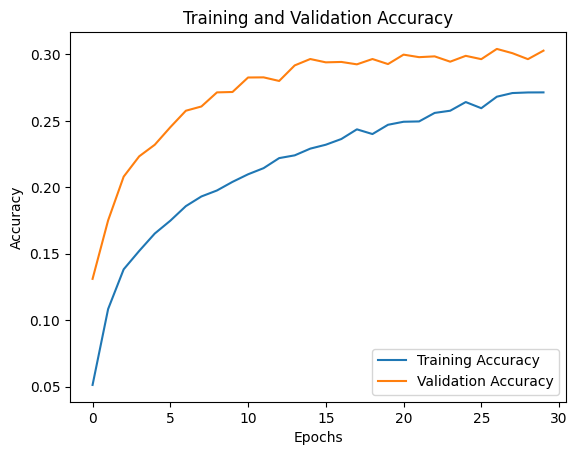

In [18]:
plt.plot(history_enhanced.history['accuracy'], label='Training Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

The model's performance did not improve after adding the dropout layer. Actually adding the dropout layer lowered the accuracy of the model. A dropout rate of 0.5 means that half of the neurons are being ignored during each training step, and maybe that was too much and, for instance, 0.2 could've been better.
Also, this could be because the model might already be well-regularized without dropout, meaning that adding dropout did not make a significant difference. Additionally, the model might require more training epochs or tuning of other hyperparameters like the learning rate for the dropout layer to have a more noticeable impact.
There is definitely room for further improvement, especially by experimenting with other techniques. For example, another approach could be experimenting with different dropout rates or trying other regularization methods like L2 regularization or batch normalization. Additionally, using a more complex model architecture or tuning the learning rate could help improve performance further.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.